<a href="https://colab.research.google.com/github/arnoldkiirya1/AI_Statistical_modelling/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Develop a machine learning model to predict the likelihood of death from rabies infection

The objectives of the case study is to create a machine leanring model for rediction of deaths and bites using the rabies data set are to develop accurate and reliable machine learning models that can help public health officials and healthcare providers to identify and respond to cases of rabies infection in a timely and effective manner.

In below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios.

You can use this flow as a template to solve any supervised ML Regression problem!

The flow of the case study is as below:

1. Reading the data in python
2. Defining the problem statement
3. Identifying the Target variable
4. Looking at the distribution of Target variable
5. Basic Data exploration
6. Rejecting useless columns
7. Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
8. Feature Selection based on data distribution
9. Outlier treatment
10. Missing Values treatment
11. Visual correlation analysis
12. Statistical correlation analysis (Feature Selection)
13. Converting data to numeric for ML
14. Sampling and K-fold cross validation
15. Trying multiple Regression algorithms
16. Selecting the best Model
17. Deploying the best model in production

## Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has two files "general_info.csv" & "rabies_bite.csv". These file contains data collected for the past 20 years.

Download the datasets from the following link: 
[Download Data](https://drive.google.com/drive/folders/1eX9uWAKZdyv-l046qCV53iscrHXbIuU5?usp=share_link)

**Data description**

The business meaning of each column in the data is as below

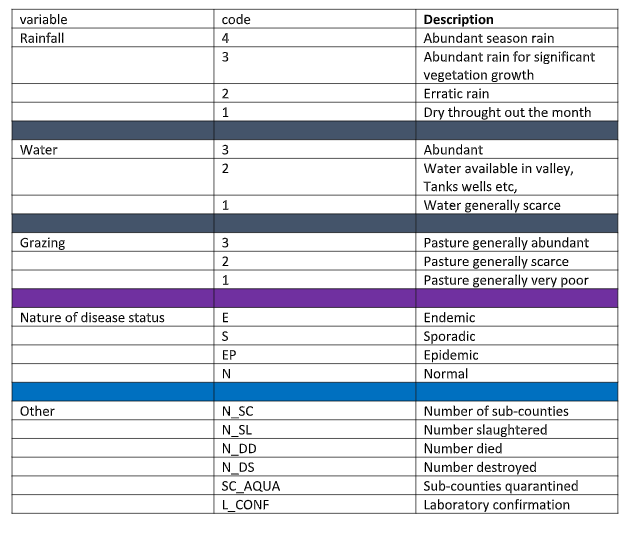

In [131]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [132]:
# Reading the dataset
import pandas as pd
import numpy as np

# General_info Dataset
GeneralInfo=pd.read_csv('general_info.csv')

# rabies_bite Dataset
RabiesBites=pd.read_csv('rabies_bite.csv')


In [133]:
#Shape for Genereal Info Data
print('Shape for General Info Data before deleting duplicate values:', GeneralInfo.shape)
GeneralInfo.head(10)

Shape for General Info Data before deleting duplicate values: (696, 5)


,District,Month,Rainfall,Water,Grazing
0,APAC,31-Jan-96,3.0,2.0,2.0
1,ARUA,31-Jan-96,1.0,3.0,2.0
2,BUNDIBUGYO,31-Jan-96,1.0,2.0,2.0
3,BUSHENYI,31-Jan-96,3.0,3.0,3.0
4,GULU,31-Jan-96,3.0,3.0,3.0
5,IGANGA,31-Jan-96,2.0,2.0,3.0
6,KABALE,31-Jan-96,3.0,3.0,3.0
7,KABAROLE,31-Jan-96,2.0,3.0,3.0
8,KAMPALA,31-Jan-96,3.0,3.0,2.0
9,KAMULI,31-Jan-96,2.0,2.0,3.0


In [134]:
#Shape for Rabies Bites Data
print('Shape for Rabies Bites Data before deleting duplicate values:', RabiesBites.shape)
RabiesBites.head(10)

Shape for Rabies Bites Data before deleting duplicate values: (482, 9)


,District,Month,Suspected cases in animals,Suspected bites by animals,Deaths,Emergency vaccinations,Dogs,Cats,Pets destroyed
0,MOROTO,31-Jan-96,6,16,0,16,20,2,0
1,KOTIDO,31-Jan-96,0,0,0,0,318,3,0
2,KABAROLE,31-Jan-96,0,0,0,0,273,0,0
3,NEBBI,31-Jan-96,2,2,0,0,0,0,0
4,KIBOGA,31-Jan-96,0,0,0,0,136,1,0
5,NTUNGAMO,31-Jan-96,0,0,0,0,10,0,0
6,BUSHENYI,31-Jan-96,2,0,0,0,560,0,0
7,TORORO,31-Jan-96,0,11,0,0,773,34,0
8,KITGUM,31-Jan-96,10,3,1,1,71,0,0
9,MASAKA,31-Jan-96,32,51,0,32,1475,212,0


In [140]:
# merge the two dataframes on columns 'A' and 'B'
Rabies_df = pd.merge(RabiesBites, GeneralInfo, on=['Month', 'District'], how='left')

print('Shape for the Data after Merging:', Rabies_df.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
Rabies_df.head(100)

Shape for the Data after Merging: (482, 12)


,District,Month,Suspected cases in animals,Suspected bites by animals,Deaths,Emergency vaccinations,Dogs,Cats,Pets destroyed,Rainfall,Water,Grazing
0,MOROTO,31-Jan-96,6,16,0,16,20,2,0,1.0,1.0,1.0
1,KOTIDO,31-Jan-96,0,0,0,0,318,3,0,1.0,1.0,1.0
2,KABAROLE,31-Jan-96,0,0,0,0,273,0,0,2.0,3.0,3.0
3,NEBBI,31-Jan-96,2,2,0,0,0,0,0,1.0,2.0,2.0
4,KIBOGA,31-Jan-96,0,0,0,0,136,1,0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,BUNDIBUGYO,31-May-96,0,0,0,0,150,0,0,4.0,3.0,3.0
96,BUSHENYI,31-May-96,0,0,0,0,739,12,0,3.0,2.0,3.0
97,GULU,31-May-96,2,2,0,0,0,0,0,4.0,3.0,3.0
98,IGANGA,31-May-96,12,22,0,0,956,36,7,4.0,3.0,3.0


In [151]:
# Removing duplicate rows if any
Rabies_df=Rabies_df.drop_duplicates()

**Defining the problem statement:**

Create a ML model which can predict the Deaths & Suspected bites by animals

**Target Variable**: Deaths & Suspected bites by animals (known as multi-output or multi-target regression or classification.)

**Predictors For Bites**: Rainfall , Water , Grazing.

**Predictors For Deaths**: Suspected bites by animals , Emergency vaccinations , Dogs , Cats, Pets destroyed .

**Determining the type of Machine Learning**

Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variables are Continuous.

Looking at the distribution of Target variables
If target variable's distribution is too skewed then the predictive modeling will not be possible.
Bell curve is desirable but slightly positive skew or negative skew is also fine
When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<Axes: >

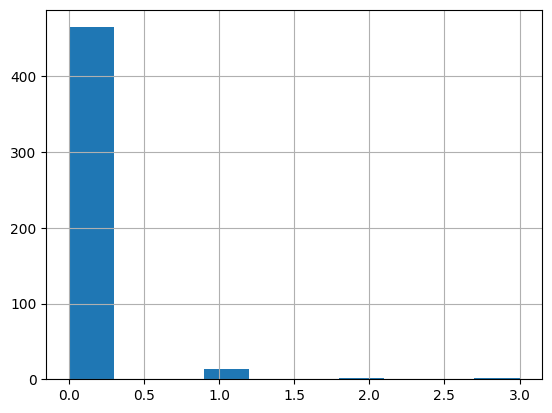

In [145]:
%matplotlib inline
# Creating Bar chart as the Deaths Target variable which is Continuous
Rabies_df['Deaths'].hist()

<Axes: >

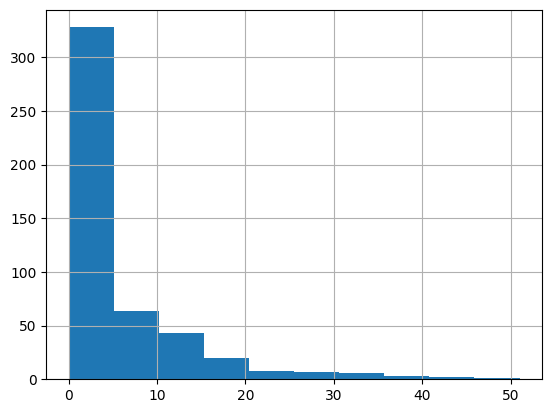

In [144]:
# Creating Bar chart as the Bites Target variable which is also Continuous
Rabies_df['Suspected bites by animals'].hist()

If the target variable's histogram doesn't look like a bell curve or is slightly skewed, there are several things you can do to handle this issue:

1. Log transformation: If the data is right-skewed, you can try applying a log transformation to make the distribution more symmetrical. This can help to reduce the impact of extreme values and make the distribution more bell-shaped.

2. Box-Cox transformation: The Box-Cox transformation is a widely used technique that can transform non-normal data into approximately normal data. It involves applying a power transformation to the data, where the optimal value of the power is selected based on the data itself.

3. Outlier removal: If the distribution is skewed due to the presence of outliers, you can try removing them to see if it improves the distribution.

4. Bin or bucket the data: Binning or bucketing involves dividing the data into a set of discrete intervals or categories, which can help to reduce the impact of small variations in the data and make the distribution more uniform.

5. Try different models: Some machine learning models are more robust to non-normal distributions than others. For example, tree-based models like Random Forest and XGBoost are generally less sensitive to non-normality than linear models like Linear Regression or Logistic Regression.

It's important to keep in mind that the choice of approach depends on the specific problem and the nature of the data. It's a good practice to try out different techniques and compare their performance to see which one works best for your problem. In this case we shall use Box-Cox Transformation


**Basic Data Exploration**

This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, does this column affect the Strength of the concrete? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python

**head()** : This helps to see a few sample rows of the data

**info()** : This provides the summarized information of the data

**describe()** : This provides the descriptive statistical details of the data

**nunique()**: This helps us to identify if a column is categorical or continuous

In [146]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
Rabies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 481
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   District                    482 non-null    object 
 1   Month                       482 non-null    object 
 2   Suspected cases in animals  482 non-null    int64  
 3   Suspected bites by animals  482 non-null    int64  
 4   Deaths                      482 non-null    int64  
 5   Emergency vaccinations      482 non-null    int64  
 6   Dogs                        482 non-null    int64  
 7   Cats                        482 non-null    int64  
 8   Pets destroyed              482 non-null    int64  
 9   Rainfall                    461 non-null    float64
 10  Water                       461 non-null    float64
 11  Grazing                     461 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 49.0+ KB


In [147]:
# Looking at the descriptive statistics of the data
Rabies_df.describe(include='all')

,District,Month,Suspected cases in animals,Suspected bites by animals,Deaths,Emergency vaccinations,Dogs,Cats,Pets destroyed,Rainfall,Water,Grazing
count,482,482,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,461.000000,461.000000,461.000000
unique,42,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARUA,31-Mar-96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,27,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4.321577,5.462656,0.047718,3.655602,189.408714,8.753112,2.626556,2.650759,2.279826,2.503254
std,NaN,NaN,8.630454,7.960640,0.280712,15.305811,372.737863,27.880783,13.152771,1.790538,0.744403,1.598399
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000,2.000000,2.000000
50%,NaN,NaN,1.000000,2.000000,0.000000,0.000000,38.500000,0.000000,0.000000,3.000000,2.000000,3.000000
75%,NaN,NaN,5.000000,8.000000,0.000000,2.000000,209.000000,5.000000,0.750000,4.000000,3.000000,3.000000


In [148]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
Rabies_df.nunique()

District                       42
Month                          33
Suspected cases in animals     35
Suspected bites by animals     38
Deaths                          4
Emergency vaccinations         38
Dogs                          226
Cats                           51
Pets destroyed                 24
Rainfall                        5
Water                           3
Grazing                         5
dtype: int64

**Basic Data Exploration Results**

Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

District : Continuous. Selected.

Month: Continuous. Selected.

Emergency vaccinations: Continuous. Selected.

Dogs: Continuous. Selected.

Cats: Continuous. Selected.

Pets destroyed: Continuous. Selected.

Rainfall: Categorical. Selected.

Water: Categorical. Selected.

Grazing: Categorical. Selected.

Suspected bites by animals: Continuous. Selected. This is the Target Variable!

**Visual Exploratory Data Analysis**

Categorical variables: Bar plot

Continuous variables: Histogram

Visualize distribution of all the Categorical Predictor variables in the data using bar plots

We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted no categorical predictors in the data

Categorical Predictors:

Rainfall, Water & Grazing

Visualize distribution of all the Continuous & Categorical Predictor variables in the data using histograms & Bar plot respectively.

array([[<Axes: title={'center': 'Emergency vaccinations'}>,
        <Axes: title={'center': 'Dogs'}>],
       [<Axes: title={'center': 'Cats'}>,
        <Axes: title={'center': 'Pets destroyed'}>]], dtype=object)

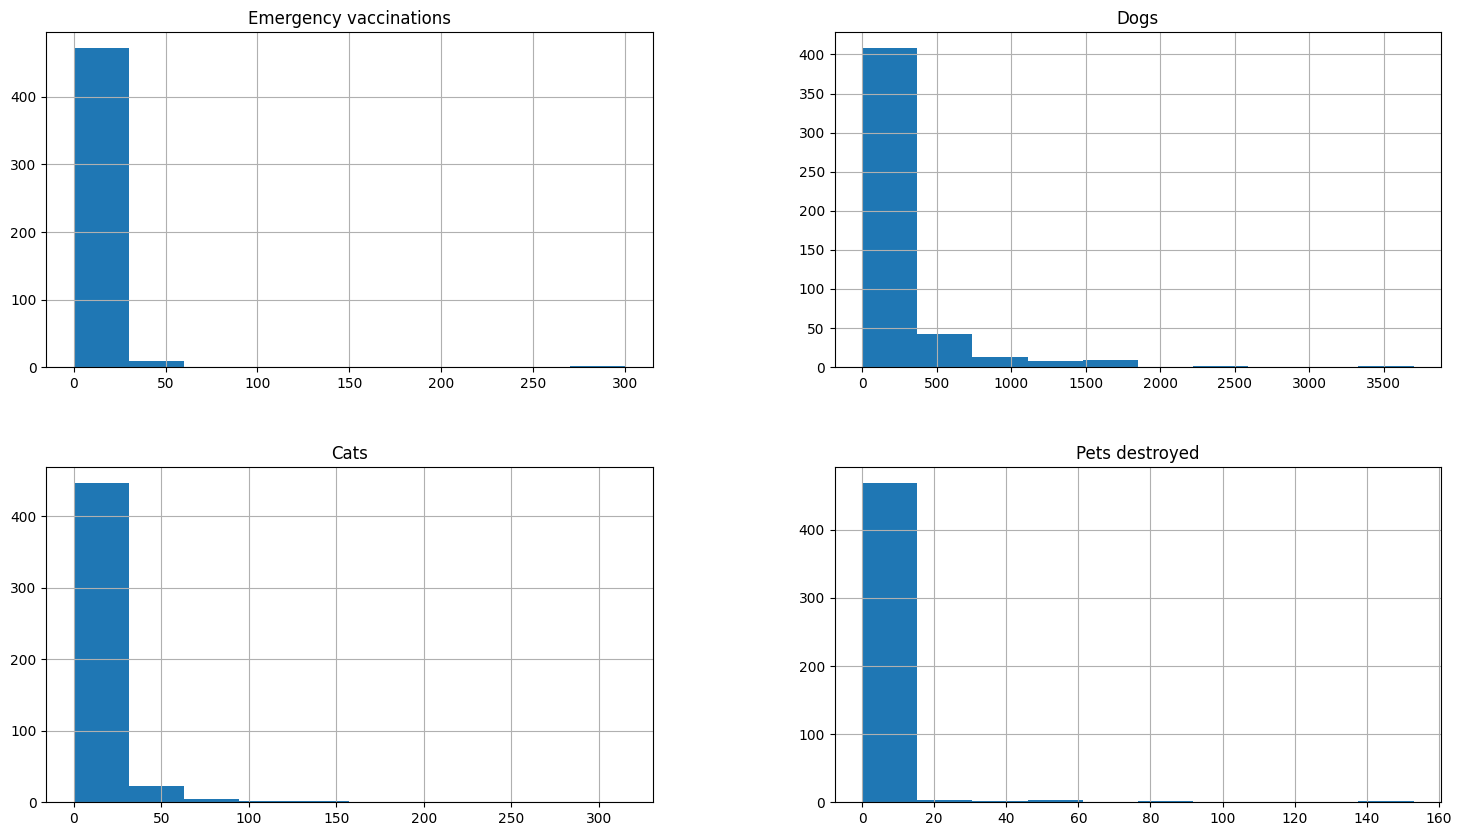

In [150]:
# Plotting histograms of multiple columns together
Rabies_df.hist(['District', 'Month', 'Emergency vaccinations','Dogs', 'Cats','Pets destroyed'], figsize=(18,10))

**Histogram Interpretation**

Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Cats", there are around 480 rows in data that has a value between 0 to 30.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

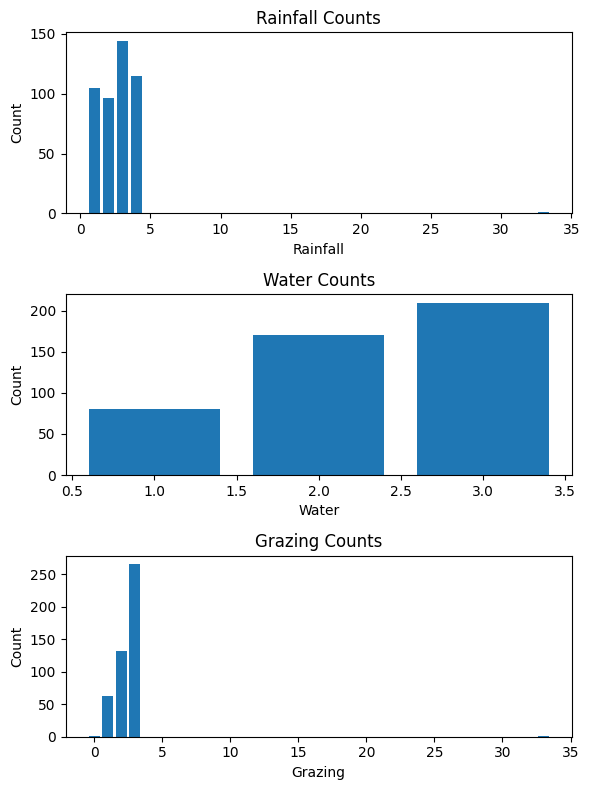

In [161]:
# Plotting Bar plots  of multiple columns together
import matplotlib.pyplot as plt


# specify the columns of interest
columns = ['Rainfall', 'Water', 'Grazing']

# create a figure with subplots
fig, axs = plt.subplots(len(columns), 1, figsize=(6, 8))

# plot a bar plot for each column
for i, column in enumerate(columns):
    # get the count of each category in the column
    counts = Rabies_df[column].value_counts()
    
    # sort the counts in ascending order
    counts = counts.sort_index()
    
    # plot the counts as a bar plot on the i-th subplot
    axs[i].bar(counts.index, counts.values)
    
    # set the title and axis labels for the i-th subplot
    axs[i].set_title(f'{column} Counts')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')

# adjust the layout of the subplots
fig.tight_layout()

# show the plot
plt.show()

**Outlier treatment**

Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

**Why I should treat the outliers?**

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

Option-1: Delete the outlier Records. Only if there are just few rows lost.

Option-2: Impute the outlier values with a logical business value